# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_diabetes_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast diabetes screenings in preventing breast diabetes deaths.

1. Cross tabulate `treatment` and `breast_diabetes_death`. What is the difference in 25-year survival rates between the control and mammogram groups?


In [1]:
#Q1

import pandas as pd
import numpy as np

cancer = pd.read_csv('/Users/borayadiul/the_bootstrap/data/mammogram.csv')
print(pd.crosstab(cancer['treatment'], cancer['breast_cancer_death']))

b = 44405/44910
c = 44425/44925

print(b)
print(c)

print('Difference: ', c - b)


breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500
0.9887552883544868
0.9888703394546466
Difference:  0.00011505110015985753


The difference would be : 0.00011505110015985753


2. Bootstrap the densities and distributions of survival rates for the two groups. 



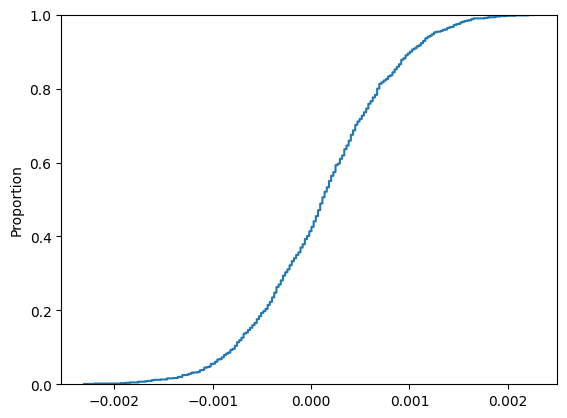

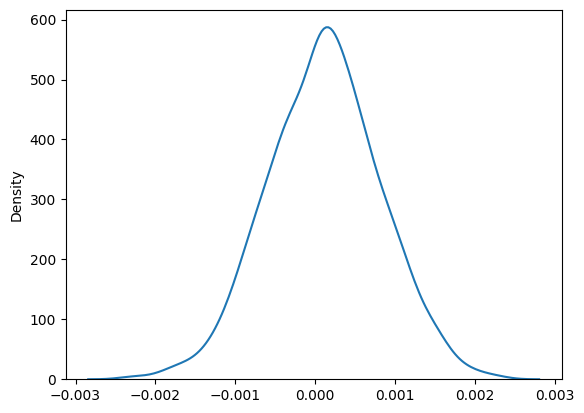

In [3]:
#Q2

import seaborn as sns
import matplotlib.pyplot as plt

cancer['survived'] = 0
cancer.loc[cancer['breast_cancer_death'] == 'no', 'survived'] = 1

S = 1000
treatment = cancer.loc[cancer['treatment'] == 'mammogram']
nothing = cancer.loc[cancer['treatment'] == 'control']
#cancer

N_t= treatment.shape[0]
N_n = nothing.shape[0]

effect_save = []

for s in range(S):
    sample_T = treatment.sample(N_t,axis=0,replace=True)
    sample_N = nothing.sample(N_n,axis=0,replace=True)
    mean_T = np.mean(sample_T['survived'])
    mean_N = np.mean(sample_N['survived'])
    effect = mean_T - mean_N
    effect_save.append(effect)
    #print(sample_T)

sns.ecdfplot(effect_save)
plt.show()

sns.kdeplot(effect_save)
plt.show()




3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?


In [74]:
#Q3
CI = np.quantile(effect_save,[.005,.995])
lower_bound1 = CI[0]
upper_bound1 = CI[1]

print('The 99% confidence interval is ', CI)
print( 'The lower bound is: ', lower_bound1, 'and the upper bound is: ', upper_bound1)

The 99% confidence interval is  [-0.00177742  0.00180732]
The lower bound is:  -0.001777415450451984 and the upper bound is:  0.001807316209120196


Yes, it does include zero.


4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results? 

This data does not take into account other life factors that cannot be reflected in the data and may be influencing the results. While zero is included in 99 confidecne interval, which would indicate the the results were not significant, this should not automatically lead to the conclusion that mammogram are not beneficial. The data is not able to caputure other variables that would give a better and more holistic context to the data in a manner that better reflects the real world. Therefore, that is why this data may over or understate. Other data I would want to include would be how participants were assigned to each group within this experiment, the socioeconomic make up of the participants in each group which may influence access to care, and other lifestyle practices to name a few.

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.



In [67]:
#Q1 

import pandas as pd
import numpy as np

diabetes = pd.read_csv('/Users/borayadiul/the_bootstrap/data/diabetes_hw.csv')
print(pd.crosstab(diabetes['treatment'], diabetes['outcome']))

outcome    failure  success
treatment                  
lifestyle      109      125
met            120      112
rosi            90      143


2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?


In [70]:
#Q2

lifestyle1 = 125/234
met1 = 112/232
rosi1 = 143/233

print("The success rate for lifestyle is: ", lifestyle1)
print("The success rate for metformin  is: ", met1)
print("The success rate for rosiglitazone is: ", rosi1)



The success rate for lifestyle is:  0.5341880341880342
The success rate for metformin  is:  0.4827586206896552
The success rate for rosiglitazone is:  0.6137339055793991


Rosi appears to be the most effective, as it has the highest success. rate of 61%

3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?


In [76]:
diabetes

,Unnamed: 0,treatment,outcome
0,1,met,success
1,2,rosi,failure
2,3,rosi,success
3,4,lifestyle,success
4,5,met,success
...,...,...,...
694,695,lifestyle,failure
695,696,lifestyle,success
696,697,lifestyle,success
697,698,met,success


In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

diabetes['succeeded'] = 0
diabetes.loc[diabetes['outcome'] == 'success', 'succeeded'] = 1

S = 500
lifestyle2 = diabetes.loc[diabetes['treatment'] == 'lifestyle']
met2 = diabetes.loc[diabetes['treatment'] == 'met']
rosi2 = diabetes.loc[diabetes['treatment'] == 'rosi']

N_life= lifestyle2.shape[0]
N_met = met2.shape[0]
N_rosi = rosi2.shape[0]

life_save = []
met_save = []
rosi_save = []

for s in range(S):
    sample_life = lifestyle2.sample(N_life,axis=0,replace=True)
    sample_met = met2.sample(N_met,axis=0,replace=True)
    sample_rosi = rosi2.sample(N_rosi,axis=0,replace=True)
    mean_life = np.mean(sample_life['succeeded'])
    mean_met = np.mean(sample_met['succeeded'])
    mean_rosi = np.mean(sample_rosi['succeeded'])
    life_save.append(mean_life)
    met_save.append(mean_met)
    rosi_save.append(mean_rosi)


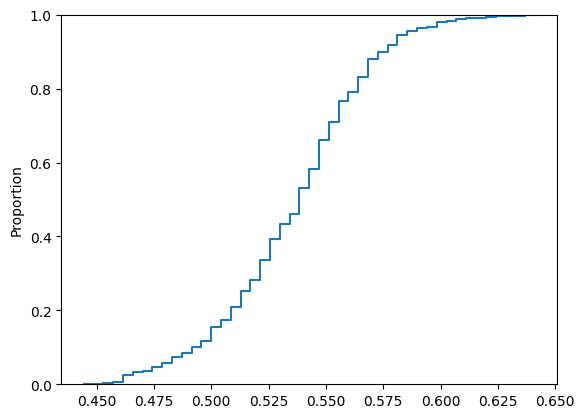

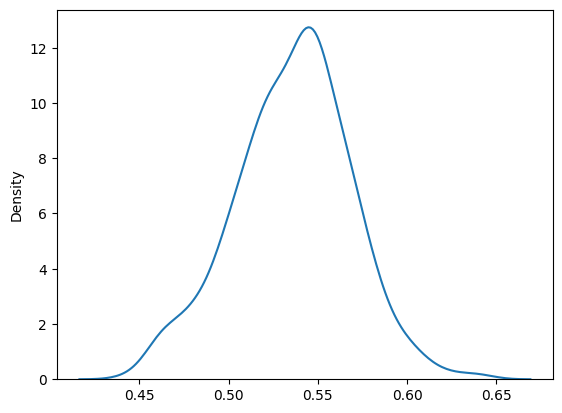

In [92]:
sns.ecdfplot(life_save)
plt.show()

sns.kdeplot(life_save)
plt.show()


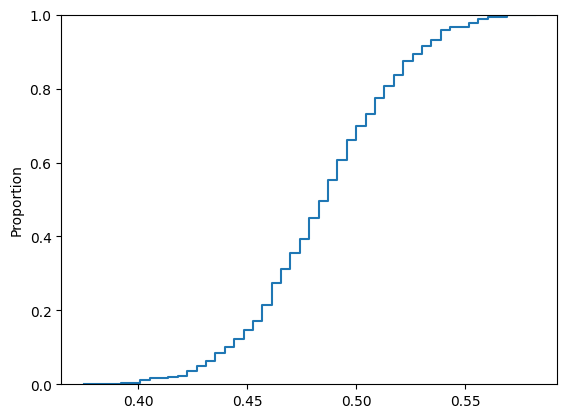

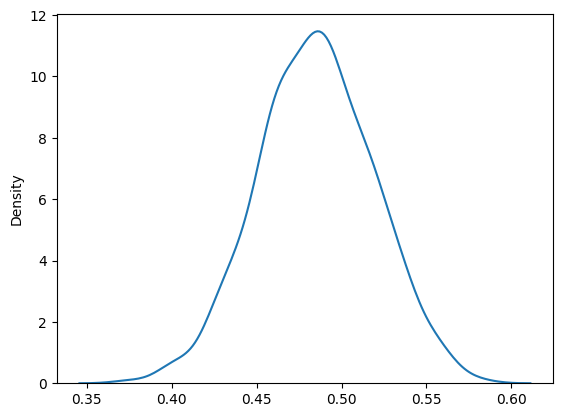

In [95]:
sns.ecdfplot(met_save)
plt.show()

sns.kdeplot(met_save)
plt.show()

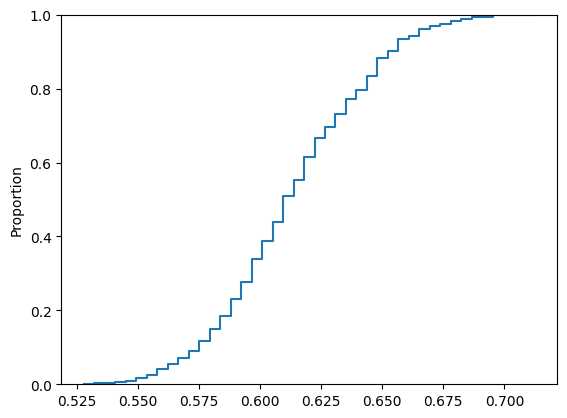

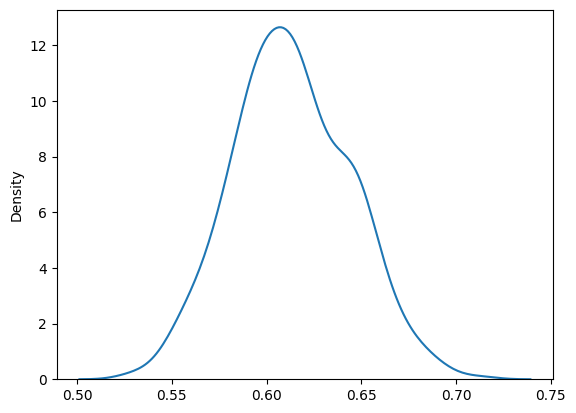

In [93]:
sns.ecdfplot(rosi_save)
plt.show()

sns.kdeplot(rosi_save)
plt.show()

I would say that the rosi treatment is the most effective. It had higher values for the both plots compared to the lifestyle or met treatments.

4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?


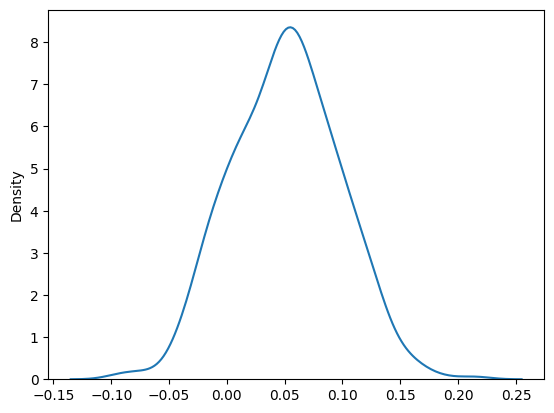

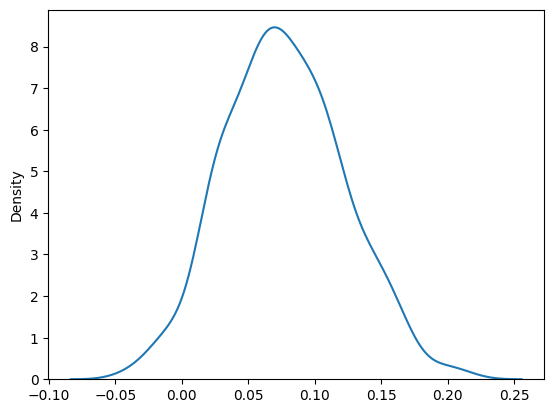

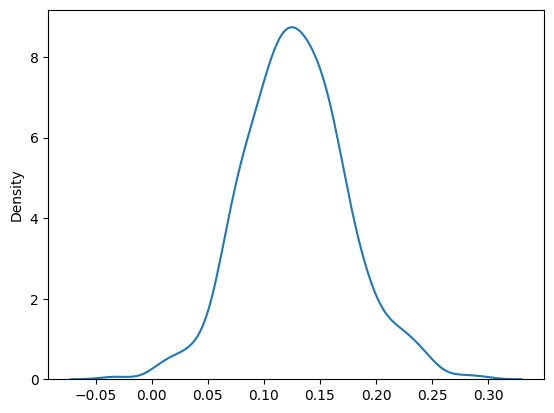

In [104]:
#Q4

lifestyle3 = np.array(life_save)
met3 = np.array (met_save)
rosi3 = np.array(rosi_save)


life_met = lifestyle3 - met3
rosi_life = rosi3 - lifestyle3
rosi_met = rosi3 - met3

sns.kdeplot(life_met)
plt.show()

sns.kdeplot(rosi_life)
plt.show()

sns.kdeplot(rosi_met)
plt.show()

In [106]:
#Q4 Confidence Interval

CI_1 = np.quantile(life_met, [.05,.95])
CI_2 = np.quantile(rosi_life, [.05,.95])
CI_3 = np.quantile(rosi_met, [.05,.95]) 

print('The 90% confidence interval for lifestyle minus metformin is: ', CI_1)
print('The 90% confidence interval for rosiglitazone minus lifestyle  is: ', CI_2)
print('The 90% confidence interval for rosiglitazone minus metformin is: ', CI_3)

The 90% confidence interval for lifestyle minus metformin is:  [-0.02155909  0.1283967 ]
The 90% confidence interval for rosiglitazone minus lifestyle  is:  [0.01112395 0.1526714 ]
The 90% confidence interval for rosiglitazone minus metformin is:  [0.06209671 0.21272384]


When looking at Lifestyle and metformin, the 90% confidence interval includes 0. This indicates that there is no significant difference between these two. When looking at rosi and lifestyle, there is a significant difference as zero is not included in the 90% confidence. When lookign at rosi and met, there is a significant difference as zero is not included in the confidence interval. 

5. Which treatment appears to be the most effective overall?

When looking at analysis that relates to health, it is important to make sure we account for all the possible effects that occur in real life and not just simply based on what the numbers from the analysis tell us. While Rosi seems to be the better fit and more effective, it may have side effects that negatively impact the individual. Lifestyle changes should probably be implemented first, as it provides a way to tackle diabetes in a behavioral way which may lead to more lasting positive outcomes on ones health overall. If lifestyle changes are not feasible for the individual or they do not result in the positive changes necessary, then I would say to turn to Rosi rather than Met as an alternative treatment based on this analysis.

**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant $\times$ age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Estimate the model, and plot the predicted survival probability by age, hued for people who receive a heart transplant and those who don't. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?